## Hierarchical Feature Engineering

This notebook explores of feature engineering and modelling for hierarchical time series. The provided dataset has four groups (hyperioncode) with a supplier and part number. Each group has between 10,000 to 40,000 observations. In the forecast, we have many parts and suppliers that have low counts and sporadic demand.

In [13]:

# import numpy as np
# import pandas as pd

# from datasetsforecast.hierarchical import HierarchicalData, HierarchicalInfo
# group_name = 'TourismSmall'
# group = HierarchicalInfo.get_group(group_name)
# Y_df, S_df, tags = HierarchicalData.load('./data', group_name)
# S_df = S_df.reset_index(names="unique_id")
# Y_df['ds'] = pd.to_datetime(Y_df['ds'])

In [1]:
# load the data
import pandas as pd
df = (
    pd.read_csv("../data/hierarchical/spends_dummy_data.csv")
    .rename(columns={'date':'ds', 'AmountUSD':'y'})
    .assign(ds = lambda x: pd.to_datetime(x.ds))
)
df.columns = df.columns.str.lower()
df.head()

hyperioncode  erpsuppliercode  partnumber                        ds  \
0            93                0           0 2023-12-01 00:00:00+00:00   
1            96                1           1 2023-12-01 00:00:00+00:00   
2            99                2           2 2023-12-01 00:00:00+00:00   
3            93                3           3 2023-12-01 00:00:00+00:00   
4            99                4           4 2023-12-01 00:00:00+00:00   

             y  
0   789.375448  
1   126.638940  
2  1514.200351  
3  2785.877639  
4  6382.573778

This data is hierarchical, but with sparse observations. We need to normalize the data and make a proper hierarchical dataframe, ensuring that each group / subgroup is accounted for.

In [2]:
from hierarchicalforecast.utils import aggregate

hierarchy_levels = [['hyperioncode'],
                    ['hyperioncode', 'erpsuppliercode'],
                    ['hyperioncode', 'erpsuppliercode', 'partnumber']]

y_hier, s_df, tags = aggregate(df=df, spec=hierarchy_levels)
print('S_df.shape', s_df.shape)
print('Y_hier_df.shape', y_hier.shape)
print("tags['hyperioncode']", tags['hyperioncode'])

S_df.shape (9942, 9254)
Y_hier_df.shape (110563, 3)
tags['hyperioncode'] ['91' '93' '96' '99']


In [5]:
y_hier

unique_id                        ds             y
0               91 2022-09-01 00:00:00+00:00  3.691280e+06
1               91 2022-10-01 00:00:00+00:00  4.870647e+06
2               91 2022-11-01 00:00:00+00:00  6.038062e+06
3               91 2022-12-01 00:00:00+00:00  2.779812e+06
4               91 2023-01-01 00:00:00+00:00  4.179511e+06
...            ...                       ...           ...
110558   99/97/871 2023-11-01 00:00:00+00:00  1.318974e+02
110559   99/97/871 2024-01-01 00:00:00+00:00  1.327446e+02
110560   99/97/871 2024-03-01 00:00:00+00:00  3.947346e+02
110561   99/97/871 2024-04-01 00:00:00+00:00  5.362301e+02
110562  99/97/8899 2022-12-01 00:00:00+00:00  2.264750e+02

[110563 rows x 3 columns]

In [3]:
s_df

unique_id  91/101/1406  91/101/174  91/101/2101  91/101/4208  \
0             91          1.0         1.0          1.0          1.0   
1             93          0.0         0.0          0.0          0.0   
2             96          0.0         0.0          0.0          0.0   
3             99          0.0         0.0          0.0          0.0   
4         91/101          1.0         1.0          1.0          1.0   
...          ...          ...         ...          ...          ...   
9937  99/97/7930          0.0         0.0          0.0          0.0   
9938  99/97/8350          0.0         0.0          0.0          0.0   
9939  99/97/8496          0.0         0.0          0.0          0.0   
9940   99/97/871          0.0         0.0          0.0          0.0   
9941  99/97/8899          0.0         0.0          0.0          0.0   

      91/101/5404  91/101/6421  91/101/733  91/101/783  91/102/177  ...  \
0             1.0          1.0         1.0         1.0         1.0  ...   
1             0.0          0.0         0.0         0.0         0.0  ...   
2             0.0          0.0         0.0         0.0         0.0  ...   
3             0.0          0.0         0.0         0.0         0.0  ...   
4             1.0          1.0         1.0         1.0         0.0  ...   
...           ...          ...         ...         ...         ...  ...   
9937          0.0          0.0         0.0         0.0         0.0  ...   
9938          0.0          0.0         0.0         0.0         0.0  ...   
9939          0.0          0.0         0.0         0.0         0.0  ...   
9940          0.0          0.0         0.0         0.0         0.0  ...   
9941          0.0          0.0         0.0         0.0         0.0  ...   

      99/97/690  99/97/7043  99/97/7050  99/97/7246  99/97/7389  99/97/7930  \
0           0.0         0.0         0.0         0.0         0.0         0.0   
1           0.0         0.0         0.0         0.0         0.0         0.0   
2           0.0         0.0         0.0         0.0         0.0         0.0   
3           1.0         1.0         1.0         1.0         1.0         1.0   
4           0.0         0.0         0.0         0.0         0.0         0.0   
...         ...         ...         ...         ...         ...         ...   
9937        0.0         0.0         0.0         0.0         0.0         1.0   
9938        0.0         0.0         0.0         0.0         0.0         0.0   
9939        0.0         0.0         0.0         0.0         0.0         0.0   
9940        0.0         0.0         0.0         0.0         0.0         0.0   
9941        0.0         0.0         0.0         0.0         0.0         0.0   

      99/97/8350  99/97/8496  99/97/871  99/97/8899  
0            0.0         0.0        0.0         0.0  
1            0.0         0.0        0.0         0.0  
2            0.0         0.0        0.0         0.0  
3            1.0         1.0        1.0         1.0  
4            0.0         0.0        0.0         0.0  
...          ...         ...        ...         ...  
9937         0.0         0.0        0.0         0.0  
9938         1.0         0.0        0.0         0.0  
9939         0.0         1.0        0.0         0.0  
9940         0.0         0.0        1.0         0.0  
9941         0.0         0.0        0.0         1.0  

[9942 rows x 9254 columns]

Next thing we need to do is resample and fill missing values with zero - pretty much every method we use will require regular time series data.

In [8]:
from utilsforecast.preprocessing import fill_gaps
y_filled = (
    fill_gaps(y_hier, freq='MS', start='global', end='global')
    .fillna(0)
    .sort_values(by=['unique_id', 'ds'])
)
y_filled

unique_id                        ds             y
0               91 2022-09-01 00:00:00+00:00  3.691280e+06
1               91 2022-10-01 00:00:00+00:00  4.870647e+06
2               91 2022-11-01 00:00:00+00:00  6.038062e+06
3               91 2022-12-01 00:00:00+00:00  2.779812e+06
4               91 2023-01-01 00:00:00+00:00  4.179511e+06
...            ...                       ...           ...
258487  99/97/8899 2024-06-01 00:00:00+00:00  0.000000e+00
258488  99/97/8899 2024-07-01 00:00:00+00:00  0.000000e+00
258489  99/97/8899 2024-08-01 00:00:00+00:00  0.000000e+00
258490  99/97/8899 2024-09-01 00:00:00+00:00  0.000000e+00
258491  99/97/8899 2024-10-01 00:00:00+00:00  0.000000e+00

[258492 rows x 3 columns]

In [9]:
from utilsforecast.plotting import plot_series
plot_series(y_filled, engine='plotly', ids=['99', '99/97', '99/97/871', '99/97/1063'])

Let's setup a problem to predict the next 3 months of demand. Let's assume intermittent series and use a naive, ARIMA, and ADIDA (intermittent model). This training can also be distributed using Spark!

https://nixtlaverse.nixtla.io/statsforecast/docs/distributed/spark.html

https://nixtlaverse.nixtla.io/statsforecast/docs/experiments/prophet_spark_m5.html

In [10]:
# Let's train some baseline moodels
from statsforecast.models import Naive, ADIDA, AutoARIMA
from statsforecast.core import StatsForecast

# Split train/test sets
y_test_df  = y_filled.groupby('unique_id', as_index=False).tail(3)
y_train_df = y_filled.drop(y_test_df.index)

# Compute base Naive and ADIDA (intermittent model) predictions
fcst = StatsForecast(models=[
    Naive(),
    AutoARIMA(),
    ADIDA()
    ], freq='MS', n_jobs=-1)

In [11]:
y_hat_df = fcst.forecast(df=y_train_df, h=3, fitted=True)

# This is necessary for the reconciliation step
y_fitted_df = fcst.forecast_fitted_values()

In [12]:
y_hat_df

unique_id                        ds         Naive
0              91 2024-08-01 00:00:00+00:00  3.981313e+06
1              91 2024-09-01 00:00:00+00:00  3.981313e+06
2              91 2024-10-01 00:00:00+00:00  3.981313e+06
3          91/101 2024-08-01 00:00:00+00:00  0.000000e+00
4          91/101 2024-09-01 00:00:00+00:00  0.000000e+00
...           ...                       ...           ...
29821   99/97/871 2024-09-01 00:00:00+00:00  0.000000e+00
29822   99/97/871 2024-10-01 00:00:00+00:00  0.000000e+00
29823  99/97/8899 2024-08-01 00:00:00+00:00  0.000000e+00
29824  99/97/8899 2024-09-01 00:00:00+00:00  0.000000e+00
29825  99/97/8899 2024-10-01 00:00:00+00:00  0.000000e+00

[29826 rows x 3 columns]

In [272]:
plot_series(y_filled, y_hat_df, engine='plotly', ids=['99', '99/97', '99/97/871', '99/97/1063'])

In [248]:
# Now let's evaluate our forecasts
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, rmse, mape

eval_df = evaluate(
    y_test_df.merge(y_hat_df, on=['unique_id', 'ds'], how='inner'),
    train_df=y_train_df,
    metrics=[mae, rmse, mape],
    models=['Naive', 'AutoARIMA', 'ADIDA']
)
eval_df

unique_id metric          Naive      AutoARIMA          ADIDA
0               91    mae  876730.898474  792700.802447  731152.946055
1           91/101    mae       0.000000     496.667868    2535.694147
2      91/101/1406    mae       0.000000       0.000000    1113.027970
3       91/101/174    mae       0.000000     488.186109     946.641362
4      91/101/2101    mae       0.000000    1201.669565     316.935894
...            ...    ...            ...            ...            ...
29821   99/97/7930   mape            NaN            NaN            NaN
29822   99/97/8350   mape            NaN            NaN            NaN
29823   99/97/8496   mape            NaN            NaN            NaN
29824    99/97/871   mape            NaN            NaN            NaN
29825   99/97/8899   mape            NaN            NaN            NaN

[29826 rows x 5 columns]

In [249]:
summary = eval_df.drop(columns='unique_id').groupby('metric').mean().reset_index()
summary

metric        Naive    AutoARIMA        ADIDA
0    mae  5777.360924  5602.082091  5637.116949
1   mape     0.990710     1.131465     1.008968
2   rmse  6401.880757  6242.098635  6253.053653

One of the features of hiearchical time series forecasting is reconciliation of forecasts. This is done to ensure that the sum of the forecasts for each group is equal to the forecast for the overall group. This may or may not be important depending on your use case.

In [246]:
from hierarchicalforecast.methods import BottomUpSparse, BottomUp, MinTrace
from hierarchicalforecast.core import HierarchicalReconciliation

reconcilers = [BottomUp(), MinTrace(method='mint_shrink')]

hrec = HierarchicalReconciliation(reconcilers=reconcilers)

Y_rec_df = hrec.reconcile(Y_hat_df=y_hat_df.fillna(0), 
                          Y_df=y_fitted_df.fillna(0),
                          S=s_df, tags=tags)
Y_rec_df.groupby('unique_id').head(2)

unique_id                        ds         Naive     AutoARIMA  \
0              91 2024-08-01 00:00:00+00:00  3.981313e+06  4.065343e+06   
1              91 2024-09-01 00:00:00+00:00  3.981313e+06  4.065343e+06   
3              93 2024-08-01 00:00:00+00:00  1.371156e+07  1.371156e+07   
4              93 2024-09-01 00:00:00+00:00  1.371156e+07  1.371156e+07   
6              96 2024-08-01 00:00:00+00:00  9.642358e+06  9.642358e+06   
...           ...                       ...           ...           ...   
29818  99/97/8496 2024-09-01 00:00:00+00:00  0.000000e+00  0.000000e+00   
29820   99/97/871 2024-08-01 00:00:00+00:00  0.000000e+00  6.890372e+01   
29821   99/97/871 2024-09-01 00:00:00+00:00  0.000000e+00  6.890372e+01   
29823  99/97/8899 2024-08-01 00:00:00+00:00  0.000000e+00  0.000000e+00   
29824  99/97/8899 2024-09-01 00:00:00+00:00  0.000000e+00  0.000000e+00   

              ADIDA  Naive/BottomUp  AutoARIMA/BottomUp  ADIDA/BottomUp  \
0      4.126891e+06    3.981313e+06        4.390939e+06    3.900609e+06   
1      4.126891e+06    3.981313e+06        4.353623e+06    3.900609e+06   
3      1.572230e+07    1.371156e+07        1.498646e+07    1.301123e+07   
4      1.572230e+07    1.371156e+07        1.568925e+07    1.301123e+07   
6      1.120976e+07    9.642358e+06        1.001731e+07    9.554410e+06   
...             ...             ...                 ...             ...   
29818  1.443650e+01    0.000000e+00        0.000000e+00    1.443650e+01   
29820  7.649104e+01    0.000000e+00        6.890372e+01    7.649104e+01   
29821  7.649104e+01    0.000000e+00        6.890372e+01    7.649104e+01   
29823  1.359416e+01    0.000000e+00        0.000000e+00    1.359416e+01   
29824  1.359416e+01    0.000000e+00        0.000000e+00    1.359416e+01   

       Naive/MinTrace_method-mint_shrink  \
0                           3.981313e+06   
1                           3.981313e+06   
3                           1.371156e+07   
4                           1.371156e+07   
6                           9.642358e+06   
...                                  ...   
29818                      -3.072842e-15   
29820                       1.001097e-14   
29821                       1.001097e-14   
29823                      -6.695455e-16   
29824                      -6.695455e-16   

       AutoARIMA/MinTrace_method-mint_shrink  \
0                               4.590932e+06   
1                               4.717856e+06   
3                               1.548746e+07   
4                               1.712873e+07   
6                               1.110371e+07   
...                                      ...   
29818                           6.408612e+00   
29820                           8.796092e+01   
29821                           1.193427e+02   
29823                          -3.024978e+00   
29824                           2.980284e+00   

       ADIDA/MinTrace_method-mint_shrink  
0                           4.068096e+06  
1                           4.068096e+06  
3                           1.362742e+07  
4                           1.362742e+07  
6                           1.043856e+07  
...                                  ...  
29818                       1.154216e+01  
29820                       6.182823e+01  
29821                       6.182823e+01  
29823                       1.397998e+01  
29824                       1.397998e+01  

[19884 rows x 11 columns]

Now let's get into feature engineering. I'm using Nixtla here because they have native Spark and Ray support and play very well at scale with Databricks. As we do feature engineering, we move from univariate classical time series models to local machine learning models and leverage the MLForecast library.

We have to be careful about our transforms and lags because we will drop a lot of the series that don't have sufficient data. So we will limit our lags to less than 6 months. This can be challenging because we can't capture yearly seasonality.

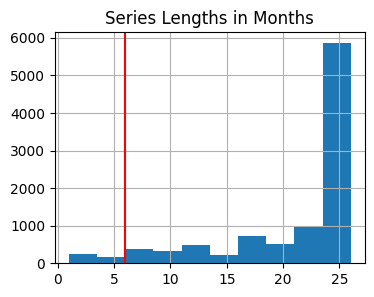

In [147]:
from matplotlib import pyplot as plt
y_filled.groupby('unique_id').count().y.hist(figsize=(4,3))
plt.title('Series Lengths in Months')
plt.axvline(x=6, color='red', linestyle='-')
plt.show()

This gives us univariate features that lend themselves well to local machine learning models.

In [151]:
from mlforecast import MLForecast
from mlforecast.lag_transforms import ExpandingMean, RollingMean
from mlforecast.target_transforms import Differences

fcst = MLForecast(
    models=[],
    freq='MS',
    lags=[3, 6],
    lag_transforms={
        3: [ExpandingMean()],
        6: [RollingMean(window_size=3)]
    },
    date_features=['quarter', 'daysinmonth'],
    target_transforms=[Differences([1])],
)

feats = fcst.preprocess(df=y_filled)
display(feats.sample(5))

unique_id                        ds            y         lag3  \
50447      93/18/93 2024-04-01 00:00:00+00:00   -62.187899   -61.448270   
122757   96/176/665 2023-08-01 00:00:00+00:00  3660.427388   624.054312   
26986     93/0/2154 2024-09-01 00:00:00+00:00   216.922056   204.129161   
10872    91/36/7011 2023-08-01 00:00:00+00:00     0.000000     0.000000   
7122    91/248/3309 2024-06-01 00:00:00+00:00     0.000000  3056.996700   

              lag6  expanding_mean_lag3  rolling_mean_lag6_window_size3  \
50447     0.000000            -3.414998                        0.000000   
122757 -339.264497           181.073342                      763.043734   
26986     1.592604             7.197241                       67.836600   
10872     0.000000          -246.238738                        0.000000   
7122      0.000000            -0.109393                    -1808.818767   

        quarter  daysinmonth  
50447         2           30  
122757        3           31  
26986         3           30  
10872         3           31  
7122          2           30

We can also seasonal decompostion. To do this, we will need to drop series with less than 12 months of data since we need enough data to properly estimate seasonality. These can then be used as exogenous features in ML models.

https://nixtlaverse.nixtla.io/statsforecast/docs/how-to-guides/generating_features.html


In [177]:
series_lengths = y_train_df.groupby('unique_id').size()
valid_series = series_lengths[series_lengths >= 12].index
y_train_df_long = y_train_df[y_train_df['unique_id'].isin(valid_series)]
y_train_df_long

unique_id                        ds             y
0               91 2022-09-01 00:00:00+00:00  3.691280e+06
1               91 2022-10-01 00:00:00+00:00  4.870647e+06
2               91 2022-11-01 00:00:00+00:00  6.038062e+06
3               91 2022-12-01 00:00:00+00:00  2.779812e+06
4               91 2023-01-01 00:00:00+00:00  4.179511e+06
...            ...                       ...           ...
210622  99/97/8899 2024-03-01 00:00:00+00:00  0.000000e+00
210623  99/97/8899 2024-04-01 00:00:00+00:00  0.000000e+00
210624  99/97/8899 2024-05-01 00:00:00+00:00  0.000000e+00
210625  99/97/8899 2024-06-01 00:00:00+00:00  0.000000e+00
210626  99/97/8899 2024-07-01 00:00:00+00:00  0.000000e+00

[171264 rows x 3 columns]

In [176]:
from statsforecast.feature_engineering import mstl_decomposition
from statsforecast.models import AutoARIMA, MSTL

transformed_df, X_df = mstl_decomposition(
    y_train_df_long, 
    model=MSTL(season_length=3), 
    freq='MS', 
    h=3
    )
display(X_df.sample(5))

unique_id                        ds        trend    seasonal
22310  99/372/6377 2024-10-01 00:00:00+00:00    45.607134   49.584524
21438   99/23/3341 2024-08-01 00:00:00+00:00    74.601893   14.735070
498    91/192/1643 2024-08-01 00:00:00+00:00  2184.768387 -289.813804
2248   91/577/5724 2024-09-01 00:00:00+00:00  1341.356135 -916.993539
10219   93/55/3302 2024-09-01 00:00:00+00:00    34.948819   48.237412

Without additional exogenous features, we can only leverage lags, rolling means, decomposition information, and categorical features based on the unique_id (we will only use the hyperioncode for now). But we can use these features to train a local machine learning model, or a global model.

In [268]:
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

models={
        'lightgbm': lgb.LGBMRegressor(verbosity=-1),
        'knn': KNeighborsRegressor(),
        'mlp': MLPRegressor(),
        'linear': LinearRegression()
    }

fcst = MLForecast(
    models=models,
    freq='MS',
    lags=[3, 6],
    lag_transforms={
        3: [ExpandingMean(), RollingMean(window_size=3)],
        6: [ExpandingMean(), RollingMean(window_size=6)]
    },
    date_features=['quarter', 'daysinmonth'],
    target_transforms=[Differences([1])]
)

Let's run cross validation, because it is the right thing to do.

In [270]:
fcst.fit(
    df=y_train_df,
    static_features=[]
)

MLForecast(models=[lightgbm, knn, mlp, linear], freq=MS, lag_features=['lag3', 'lag6', 'expanding_mean_lag3', 'rolling_mean_lag3_window_size3', 'expanding_mean_lag6', 'rolling_mean_lag6_window_size6'], date_features=['quarter', 'daysinmonth'], num_threads=1)

In [271]:
forecast_df = fcst.predict(3)
plot_series(y_filled, forecast_df, engine='plotly', ids=['99', '99/97', '99/97/871', '99/97/1063'])

Interestingly, the ML models actually perform quite a bit worse than the traditional models.

In [290]:
eval_df = evaluate(
    forecast_df.merge(y_test_df),
    metrics=[mae, rmse, mape],
    models=['lightgbm', 'knn', 'mlp', 'linear']
)
summary = eval_df.drop(columns='unique_id').groupby('metric').mean().reset_index()
summary

metric     lightgbm          knn           mlp       linear
0    mae  7912.638290  7433.361375   9129.444385  7333.253469
1   mape   127.400583   181.975132    357.635944   346.614090
2   rmse  8686.992371  8150.581045  10084.108620  8186.836631